In [1]:
#Import the necessary packages

import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
#Import the data set and visualize the first few rows
data = pd.read_csv('adult.data')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [15]:
#Analysis of categorical variables using value.counts()
#Rename columns in a meaningful way

data.columns = ['Age', 'Workclass','fnlwgt','Education','Educational-num','Marital-status',
               'Occupation','Relationship','Race','Gender','Capital-gain','Capital-loss',
               'Hours-per-week','Native-country','Income']
data.head()

,Age,Workclass,fnlwgt,Education,Educational-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
#Quick Statistical summary of nummerical features contained in our dataset
data.describe()

,Age,fnlwgt,Educational-num,Capital-gain,Capital-loss,Hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
#Analysis of Categorical Variables
data['Marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital-status, dtype: int64

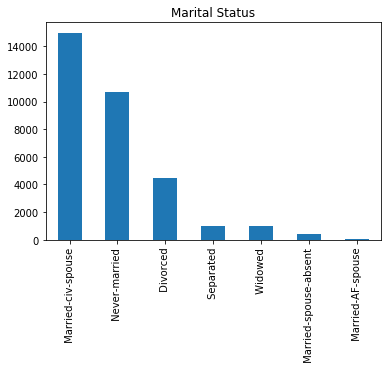

In [19]:
#Visualize Categorical Variables:
plt.title('Marital Status')
data['Marital-status'].value_counts().plot.bar()

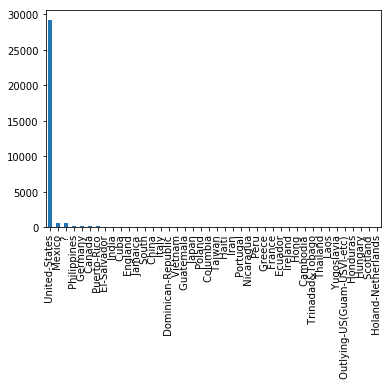

In [20]:
#Let's look at the catergorical variable "Native Country"
data['Native-country'].value_counts().plot.bar()

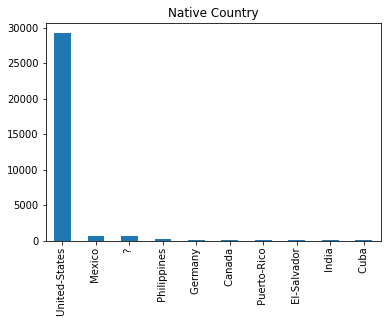

In [22]:
#Let's plot the top n values to get better insights
plt.title('Native Country')
data['Native-country'].value_counts().nlargest(10).plot.bar()

In [24]:
#Grouping features by their income category
round(data.groupby(['Income']).mean(),2)

,Age,fnlwgt,Educational-num,Capital-gain,Capital-loss,Hours-per-week
Income,,,,,,
<=50K,36.78,190345.43,9.59,148.67,53.15,38.84
>50K,44.25,188005.00,11.61,4006.14,195.00,45.47


 <=50K         AxesSubplot(0.1,0.15;0.363636x0.75)
 >50K     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

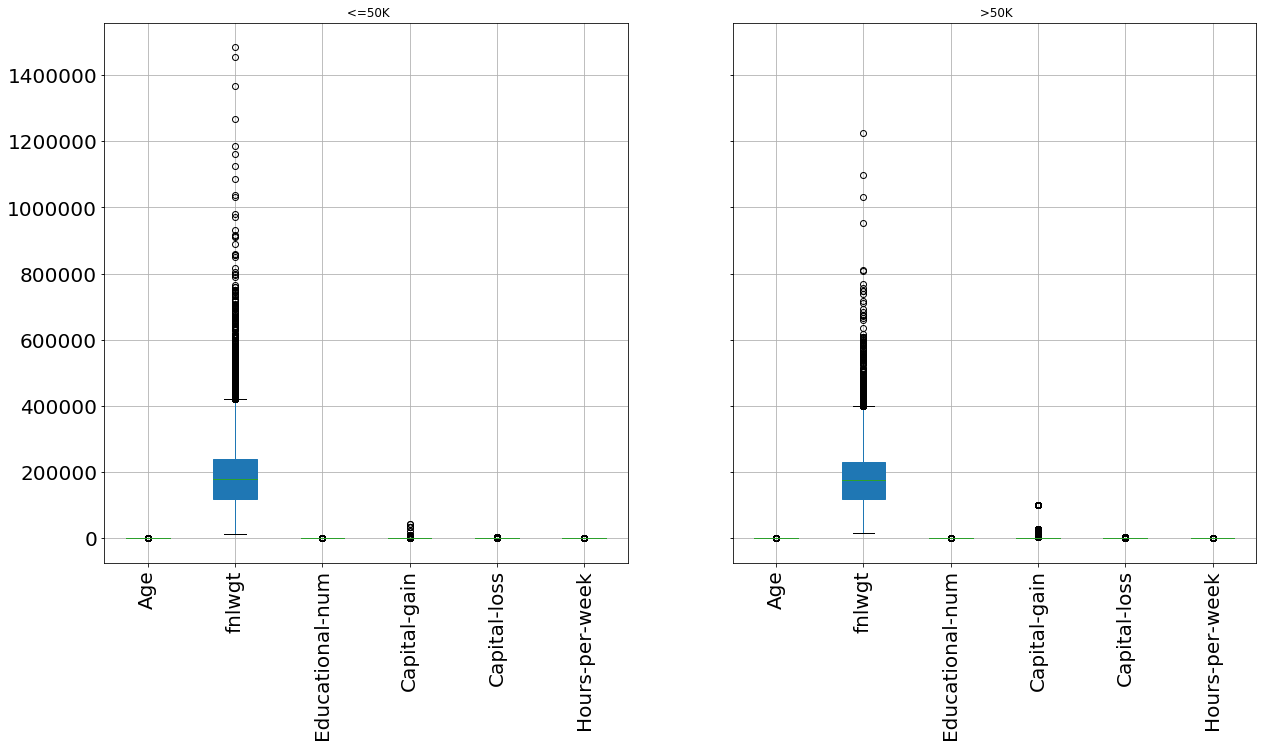

In [26]:
#Visualize the variance in distributions for the two group
data.groupby('Income').boxplot(fontsize = 20, rot = 90, figsize = (20,10), 
                              patch_artist = True)

 <=50K         AxesSubplot(0.1,0.15;0.363636x0.75)
 >50K     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

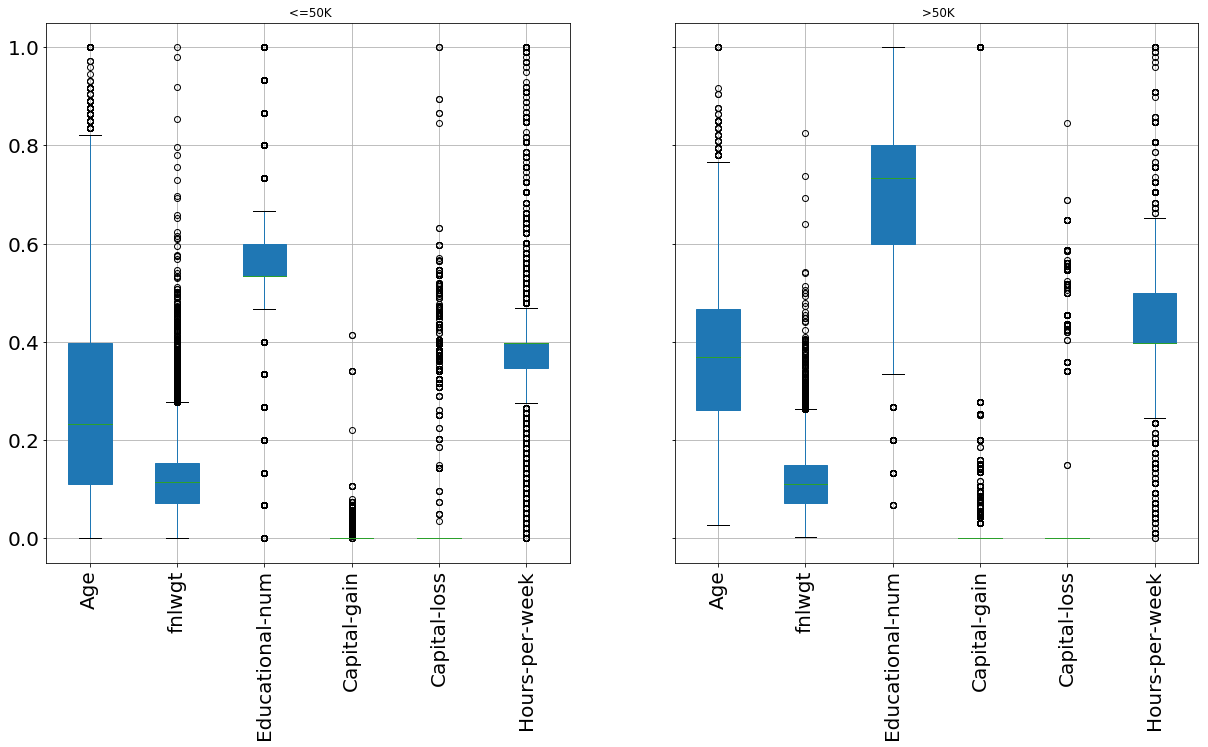

In [28]:
#Scalue to the values so that they all lie between 0 and 1 for better visualization

numeric_features = data.select_dtypes(include = ['int64','float64']).columns
categorical_features = data.select_dtypes(include = ['object']).columns

numeric_data = data[numeric_features]
categorical_data = data[categorical_features]

x = numeric_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numeric_data = pd.DataFrame(x_scaled, columns = numeric_data.columns)
data_transformed = pd.concat([numeric_data, categorical_data], axis = 1)
data_transformed.groupby('Income').boxplot(fontsize = 20, rot = 90, 
                                           figsize = (20,10), patch_artist = True)

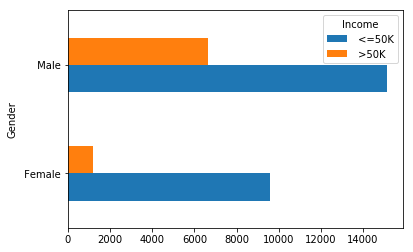

In [31]:
#Use the groupby function to compare categorical features
data.groupby('Income').Gender.value_counts().unstack(0).plot.barh()

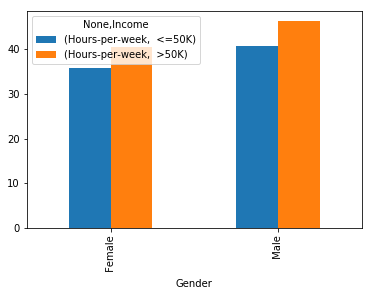

In [36]:
#Making use of pivot Tables to see if females make less due to less workings hours
pivot_workclass = pd.pivot_table(data, values=['Hours-per-week'],
                                index = 'Gender',
                                columns = 'Income',
                                aggfunc = np.mean, fill_value = 0).plot.bar()